In [4]:
import numpy as np
from scipy.interpolate import CubicSpline
import pandas as pd
import matplotlib.pyplot as plt

## Actual yield curve

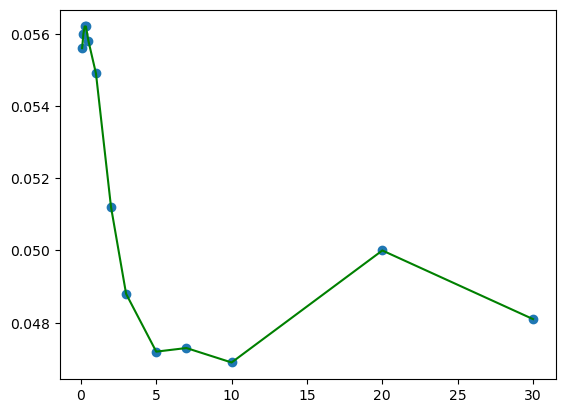

In [5]:
# Data
xin = np.array([1/12, 2/12, 3/12, 4/12, 6/12, 1, 2, 3, 5, 7, 10, 20, 30])
yin = np.array([556, 560, 562, 562, 558, 549, 512, 488, 472, 473, 469, 500, 481]) / 10000  # Convert basis points to a rate
plt.plot(xin, yin, 'g-')
plt.scatter(xin, yin)
plt.show()

# Cubic spline interpolation for the yield curve and bond price

In [7]:
dt = 0.25
n = int(xin[-1] / dt + 1)
# Maturities for which we want to calculate bond prices
t = np.linspace(0, 30, n)  # 0 to 30 years with 0.25 increments

cs = CubicSpline(xin, yin, bc_type='natural')
interpolated_yields = cs(t)

# Calculate zero-coupon bond prices
F = 100  # Face value of the bond
bond_prices = F / (1 + interpolated_yields)**t

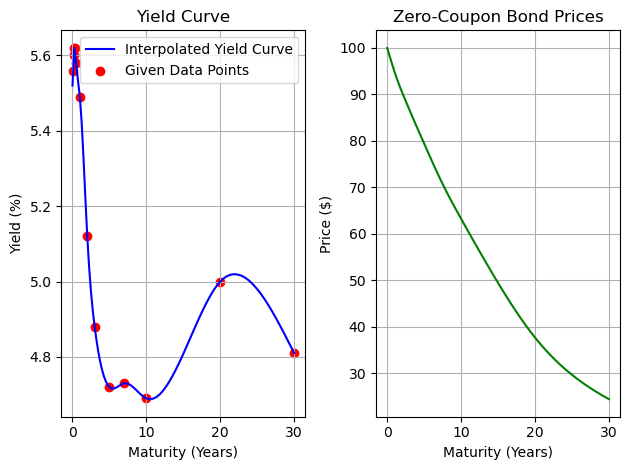

In [8]:
# Plot the yield curve
plt.subplot(1, 2, 1)
plt.plot(t, interpolated_yields*100, 'b-', label='Interpolated Yield Curve')
plt.scatter(xin, yin*100, color='red', marker='o', label='Given Data Points')
plt.title('Yield Curve')
plt.xlabel('Maturity (Years)')
plt.ylabel('Yield (%)')
plt.legend()
plt.grid(True)

# Plot the bond prices
plt.subplot(1, 2, 2)
plt.plot(t, bond_prices, 'g-', label='Zero-Coupon Bond Prices')
plt.title('Zero-Coupon Bond Prices')
plt.xlabel('Maturity (Years)')
plt.ylabel('Price ($)')
plt.grid(True)

plt.tight_layout()
plt.show()

In [ ]:
# Convert the data to a DataFrame
df = pd.DataFrame({'Time': t,
                   'interpolated_yields_curves': interpolated_yields,
                   'Bond_Prices': bond_prices,
                   })

# Save the DataFrame to a CSV file
df.to_csv('/nterpolated_Yield_Curve.csv', index=False)